# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Muhammad Nur Irfan
- **Email:** itzirfanmt@gmail.com
- **ID Dicoding:** Muhammad Nur Irfan

## Menentukan Pertanyaan Bisnis

- Bagaimana perkembangan penyewaan sepeda tiap tahun ?
- Bagaimana perbedaan user yang tidak terdaftar dan user yang terdaftar pada penyewaan sepeda ?
- Pada musim apakah penyewaan sepeda mencapai puncaknya ?
- Pada hari apakah penyewaan sepeda mencapai puncaknya ?
- Apakah dengan adanya Liburan meningkatkan penyewaan sepeda ?
- Apakah cuaca mempengaruhi jumlah penyewaan sepeda ?


## Import Semua Packages/Library yang Digunakan

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [46]:
df = pd.read_csv("./Data/day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Dataset Charateristics based from Readme Txt:**
- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

### Assessing Data

#### **A. Mengidentifikasi Missing Values**

In [47]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Berdasarkan Informasi fungsi isnull() berikut, dataset ini tidak memiliki Missing Value sama sekali

#### **B. Mengidentifikasi Duplikasi Data**

In [48]:
df.duplicated().sum()

np.int64(0)

Berdasrakan informasi fungsi duplicated() berikut, dataset ini tidak memiliki data yang duplikat 

#### **C. Mengidentifikasi Struktur Data**

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Berdsarkan informasi fungsi info() berikut, ada beberapa hal yang bisa diperhatikan:

**Perubahan nama kolom**
perubahan nama kolom dapat dilakukan untuk mempermudah interpretasi data
- `dteday` -> `date`
- `yr` -> `year`
- `mnth` -> `month`
- `hum` -> `humidity`
- `cnt` -> `total`

**Perubahan tipe data**
- tipe data `date` dapat diubah ke **datetime**
- tipe data `season` dapat diubah ke **category**
- tipe data `holiday` dapat diubah ke **category**
- tipe data `workingday` dapat diubah ke **category**
- tipe data `weathersit` dapat diubah ke **category**

**Perubahan nilai data**\
- kolom `temp`, `atemp`, `hum`, `windspeed` merupakan data yang sudah dinormalisasi, untuk memahami data lebih baik saya akan mengembalikan data menjadi data semula
- kolom `weekday`, `month`, `year` dapat diubah sesuai dengan date

#### **D. Identifikasi Statistik Dataset**

In [50]:
df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


### **Assessing Data Insight:**
**Perubahan Nama Kolom**\
Diperlukan untuk memberikan interpretasi data yang jelas
- `dteday` -> `date`
- `yr` -> `year`
- `mnth` -> `month`
- `hum` -> `humidity`
- `cnt` -> `total`
---
**Perubahan tipe data**\
Diperlukan untuk memudahkan pengolahan data
- tipe data `date` dapat diubah ke **datetime**
- tipe data `season` dapat diubah ke **category**
- tipe data `holiday` dapat diubah ke **category**
- tipe data `workingday` dapat diubah ke **category**
- tipe data `weathersit` dapat diubah ke **category**
---
**Perubahan nilai data**
- kolom `temp`, `atemp`, `hum`, `windspeed` merupakan data yang sudah dinormalisasi, untuk memahami data lebih baik saya akan mengembalikan data menjadi data semula
- kolom `weekday`, `month`, `year` dapat diubah sesuai dengan date

---
**Penghapusan Kolom**\
kolom `Instant` hanya indeks data, tidak terlalu berpengaruh terhadap informasi data

### Cleaning Data

#### **A. Merubah nama Kolom**

In [51]:
df.rename(columns={
          "dteday": "date",
          "yr": "year",
          "mnth": "month",
          "hum": "humidity",
          "cnt": "total"}, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   date        731 non-null    object 
 2   season      731 non-null    int64  
 3   year        731 non-null    int64  
 4   month       731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  humidity    731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  total       731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


#### **B. Merubah Tipe Data**

In [52]:
df['date'] = pd.to_datetime(df['date'])
df['season'] = df['season'].astype('category')
df['holiday'] = df['holiday'].astype('category')
df['workingday'] = df['workingday'].astype('category')
df['weathersit'] = df['weathersit'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   date        731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   year        731 non-null    int64         
 4   month       731 non-null    int64         
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  humidity    731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  total       731 non-null    int64         
dtypes: category(4), datetime64

#### **C. Merubah Nilai Data**

Merubah nilai data `temp`, `atemp`, `humidity` dan `windspeed`

In [53]:
df['temp'] = df['temp']*41
df['atemp'] = df['atemp']*50
df['humidity'] = df['humidity']*100
df['windspeed'] = df['windspeed']*67

df[['atemp', 'temp', 'humidity', 'windspeed']].head()

,atemp,temp,humidity,windspeed
0,18.18125,14.110847,80.5833,10.749882
1,17.68695,14.902598,69.6087,16.652113
2,9.47025,8.050924,43.7273,16.636703
3,10.60610,8.200000,59.0435,10.739832
4,11.46350,9.305237,43.6957,12.522300



merubah kolom `weekday`, `month`, dan `year` sesuai dengan date 

In [54]:
df['weekday'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.month_name()
df['year'] = df['date'].dt.year

df.head(7)

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,total
0,1,2011-01-01,1,2011,January,0,Saturday,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,1,2011,January,0,Sunday,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,1,2011,January,0,Monday,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,1,2011,January,0,Tuesday,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,1,2011,January,0,Wednesday,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,2011-01-06,1,2011,January,0,Thursday,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,2011-01-07,1,2011,January,0,Friday,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510


Merubah Value dari kolom `Season` dan `Weathersit` menjadi dari numerik menjadi kategorik sesuai dengan Dataset Dictionary

In [55]:
df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
df.weathersit.replace((1,2,3,4), ('Clear or Cloudy','Foggy','Drizzling','Severe Weather'), inplace=True)

df.head(7)

C:\Users\itzir\AppData\Local\Temp\ipykernel_6284\3748698256.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
C:\Users\itzir\AppData\Local\Temp\ipykernel_6284\3748698256.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df.season.rep

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,total
0,1,2011-01-01,Spring,2011,January,0,Saturday,0,Foggy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,Spring,2011,January,0,Sunday,0,Foggy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,Spring,2011,January,0,Monday,1,Clear or Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,Spring,2011,January,0,Tuesday,1,Clear or Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,Spring,2011,January,0,Wednesday,1,Clear or Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,2011-01-06,Spring,2011,January,0,Thursday,1,Clear or Cloudy,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,2011-01-07,Spring,2011,January,0,Friday,1,Foggy,8.057402,10.44195,49.8696,11.304642,148,1362,1510


#### **D. Menghapus Kolom**

Kolom instant sebaiknya dihapus karena hanya merupakan index yang tidak memberikan informasi penting

In [56]:
df.drop(columns=['instant'], inplace=True)

#### **E. Menyimpan Data yang sudah bersih**

In [57]:
df.to_csv('cleaned_day_dataset.csv', index=False)

## Exploratory Data Analysis (EDA)

Berdasarkan Analisis, saya dapat membuat satu kolom baru weekend yang merupakan hari Sabtu dan Minggu untuk memberikan pengetahuan akan tingkat sales pada weekday dengan weekend

In [58]:
df["weekend"] = df["weekday"].apply(lambda x: 1 if x in ["Saturday", "Sunday"] else 0)
df["weekend"] = df["weekend"].astype("category")

cols = df.columns.tolist()
workingday_index = cols.index("workingday")
cols.insert(workingday_index + 1, cols.pop(cols.index("weekend")))
df = df[cols]

df.to_csv('updated_day_dataset.csv', index=False)

In [59]:
df.head()

,date,season,year,month,holiday,weekday,workingday,weekend,weathersit,temp,atemp,humidity,windspeed,casual,registered,total
0,2011-01-01,Spring,2011,January,0,Saturday,0,1,Foggy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2011-01-02,Spring,2011,January,0,Sunday,0,1,Foggy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2011-01-03,Spring,2011,January,0,Monday,1,0,Clear or Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2011-01-04,Spring,2011,January,0,Tuesday,1,0,Clear or Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2011-01-05,Spring,2011,January,0,Wednesday,1,0,Clear or Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### **Menjawab Pertanyaan Bisnis**

**Mengetahui perkembangan penyewaan sewa sepeda tiap tahunnya**

In [60]:
yearly_rentals = df.groupby("year")["total"].agg(["mean", "sum", "count"])
yearly_rentals

,mean,sum,count
year,,,
2011,3405.761644,1243103,365
2012,5599.934426,2049576,366


**Mengetahui perbedaan banyak user Casual dan Registered**

In [61]:
user_type = df.agg({"casual": ["mean", "sum"], "registered": ["mean", "sum"]})
user_type

,casual,registered
mean,848.176471,3.656172e+03
sum,620017.000000,2.672662e+06


**Mengetahui Musim yang memiliki penyewaan tertinggi**

In [62]:
season_peak = df.groupby("season")["total"].agg(["mean", "sum"]).sort_values(by="mean", ascending=False)
season_peak

C:\Users\itzir\AppData\Local\Temp\ipykernel_6284\2237792688.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_peak = df.groupby("season")["total"].agg(["mean", "sum"]).sort_values(by="mean", ascending=False)


,mean,sum
season,,
Fall,5644.303191,1061129
Summer,4992.331522,918589
Winter,4728.162921,841613
Spring,2604.132597,471348


**Mengetahui Hari yang memiliki penyewaan tertinggi**

In [63]:
weekday_weekend_group = df.groupby("weekday", sort=False)["total"].agg(["mean", "sum"])
weekday_weekend_group

,mean,sum
weekday,,
Saturday,4550.542857,477807
Sunday,4228.828571,444027
Monday,4338.123810,455503
Tuesday,4510.663462,469109
Wednesday,4548.538462,473048
Thursday,4667.259615,485395
Friday,4690.288462,487790


**Mengetahui pengaruh dari hari libur terhadap penyewaan sepeda**

In [64]:
holiday_effect = df.groupby("holiday")["total"].agg(["mean", "sum"])
holiday_effect

C:\Users\itzir\AppData\Local\Temp\ipykernel_6284\2638559828.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  holiday_effect = df.groupby("holiday")["total"].agg(["mean", "sum"])


,mean,sum
holiday,,
0,4527.104225,3214244
1,3735.000000,78435


**Mengetahui pengaruh dari cuaca terhadap penyewaan sepeda**

In [65]:
weather_effect = df.groupby("weathersit")["total"].agg(["mean", "sum"]).sort_values(by="mean", ascending=False)
weather_effect

C:\Users\itzir\AppData\Local\Temp\ipykernel_6284\2983106649.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_effect = df.groupby("weathersit")["total"].agg(["mean", "sum"]).sort_values(by="mean", ascending=False)


,mean,sum
weathersit,,
Clear or Cloudy,4876.786177,2257952
Foggy,4035.862348,996858
Drizzling,1803.285714,37869


## Visualization & Explanatory Analysis

#### **Bagaimana Perkembangan Penyewaan Sepeda Pertahunnya ?**

C:\Users\itzir\AppData\Local\Temp\ipykernel_6284\2595423517.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  daily_rentals = df.resample('M')['total'].sum()


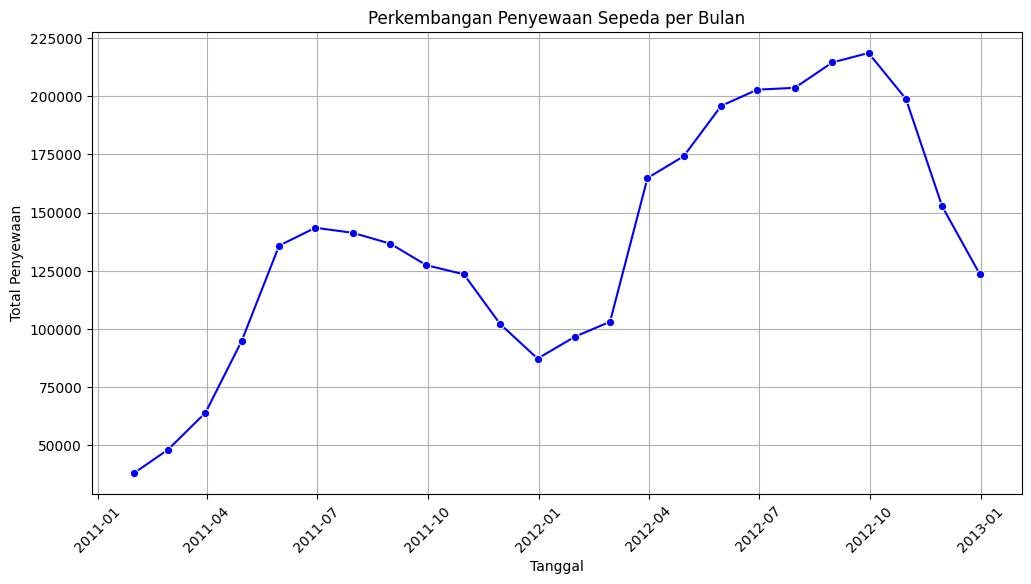

In [66]:
# Visualisasi Line Chart Perkembangan Penyewaan Sepeda
df.set_index('date', inplace=True)
daily_rentals = df.resample('M')['total'].sum()

plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_rentals.index, y=daily_rentals, marker="o", color="b")
plt.title("Perkembangan Penyewaan Sepeda per Bulan")
plt.xlabel("Tanggal")
plt.ylabel("Total Penyewaan")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### **Bagaimana perbedaan user yang tidak terdaftar dan user yang terdaftar pada penyewaan sepeda ?**


C:\Users\itzir\AppData\Local\Temp\ipykernel_6284\3160729257.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Casual", "Registered"], y=user_type.loc["mean"], palette="viridis")


Text(0, 0.5, 'Rata-rata Penyewaan')

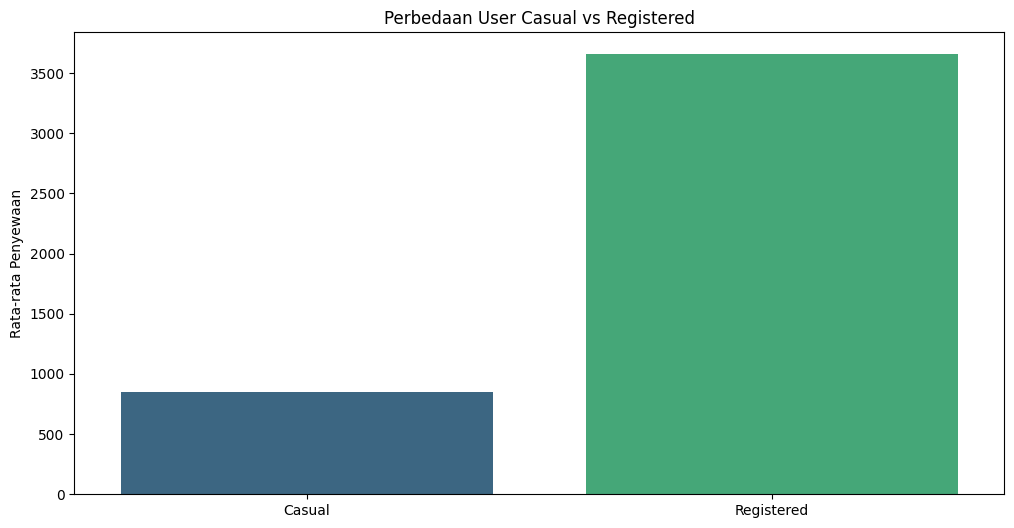

In [67]:
plt.figure(figsize=(12, 6))
sns.barplot(x=["Casual", "Registered"], y=user_type.loc["mean"], palette="viridis")
plt.title("Perbedaan User Casual vs Registered")
plt.ylabel("Rata-rata Penyewaan")


#### **Pada musim apakah penyewaan sepeda mencapai puncaknya ?**


C:\Users\itzir\AppData\Local\Temp\ipykernel_6284\4128534902.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_peak.index, y=season_peak["mean"], palette="magma")


Text(0, 0.5, 'Rata-rata Penyewaan')

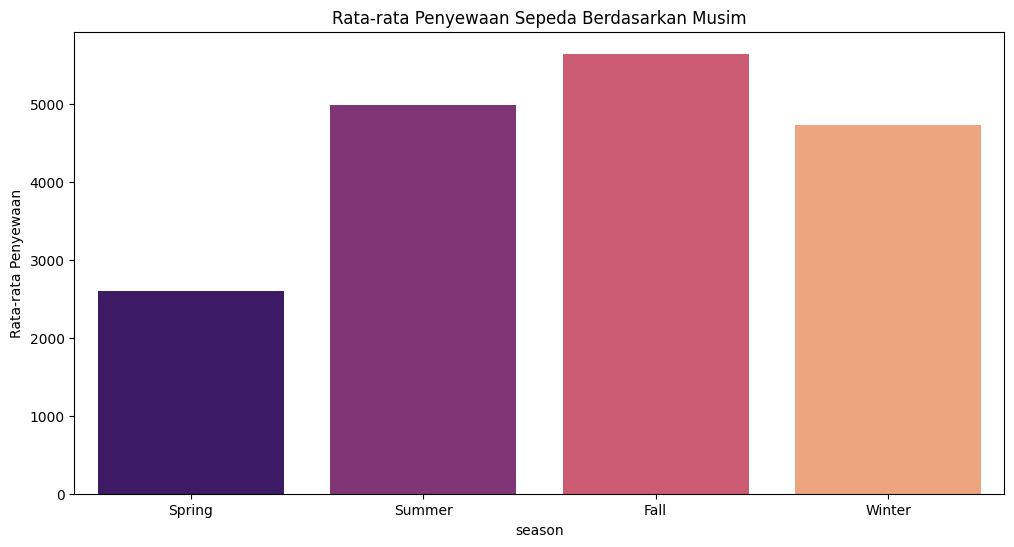

In [68]:
plt.figure(figsize=(12, 6))
sns.barplot(x=season_peak.index, y=season_peak["mean"], palette="magma")
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Musim")
plt.ylabel("Rata-rata Penyewaan")

#### **Pada hari apakah penyewaan sepeda mencapai puncaknya ?**



C:\Users\itzir\AppData\Local\Temp\ipykernel_6284\2038847948.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_weekend_group.index, y=weekday_weekend_group_sorted["sum"], palette="coolwarm")


Text(0, 0.5, 'Sum of Rentals')

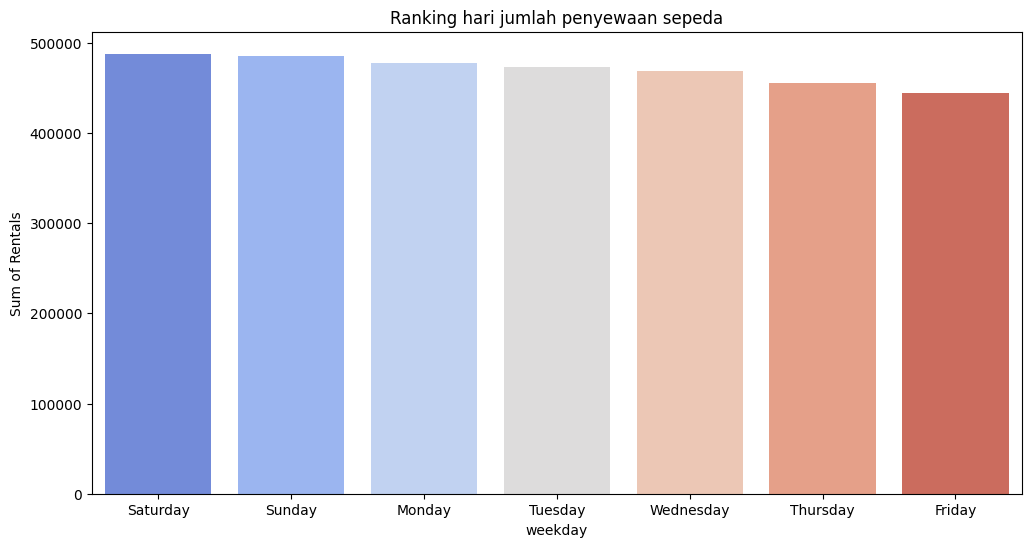

In [ ]:
weekday_weekend_group_sorted = weekday_weekend_group.sort_values(by="sum", ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=weekday_weekend_group.index, y=weekday_weekend_group_sorted["sum"], palette="coolwarm")
plt.title("Ranking hari jumlah penyewaan sepeda")
plt.ylabel("Sum of Rentals")

#### **Apakah dengan adanya Liburan meningkatkan penyewaan sepeda ?**



C:\Users\itzir\AppData\Local\Temp\ipykernel_6284\2787596846.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Hari Biasa", "Hari Libur"], y=holiday_effect["mean"], palette="rocket")


Text(0.5, 1.0, 'Pengaruh Hari Libur terhadap Penyewaan')

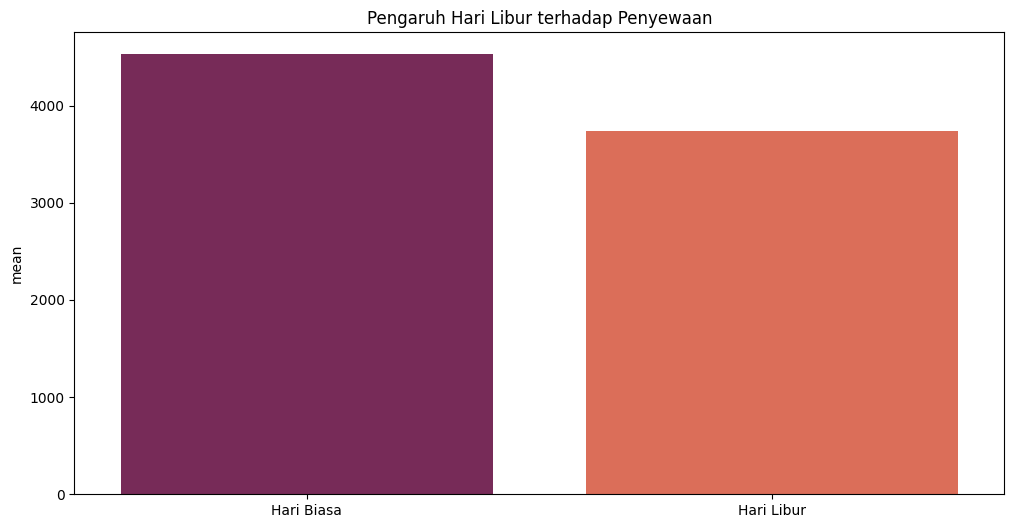

In [70]:
plt.figure(figsize=(12, 6))
sns.barplot(x=["Hari Biasa", "Hari Libur"], y=holiday_effect["mean"], palette="rocket")
plt.title("Pengaruh Hari Libur terhadap Penyewaan")


#### **Apakah cuaca mempengaruhi jumlah penyewaan sepeda ?**


C:\Users\itzir\AppData\Local\Temp\ipykernel_6284\2607199121.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_effect.index, y=weather_effect["mean"], palette="Set2")


Text(0, 0.5, 'Mean')

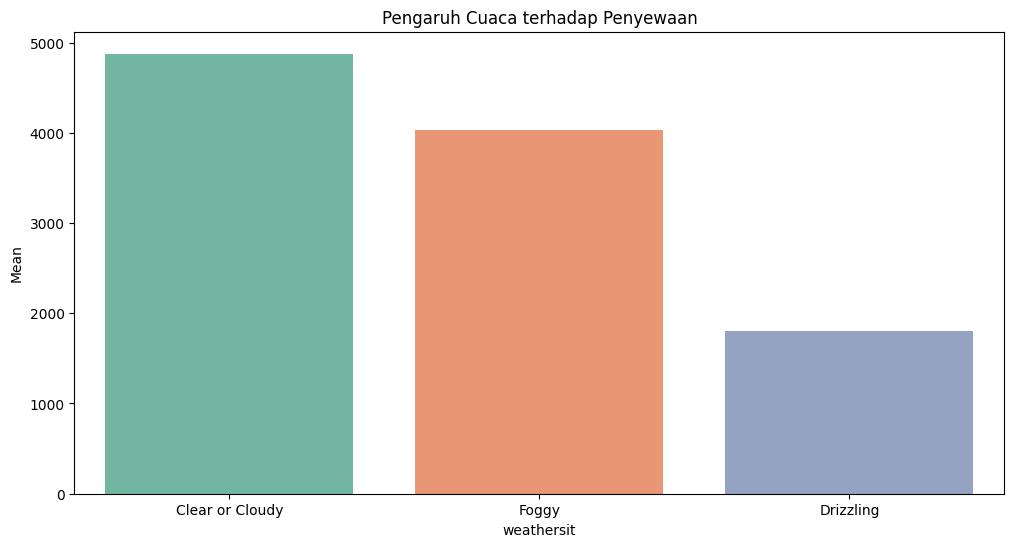

In [71]:
plt.figure(figsize=(12, 6))
sns.barplot(x=weather_effect.index, y=weather_effect["mean"], palette="Set2")
plt.title("Pengaruh Cuaca terhadap Penyewaan")
plt.ylabel("Mean")

## Analisis Lanjutan (Opsional)

## **Analisis Clustering tanpa menggunakan Model Machine Learning**

#### **Pertanyaan Tambahan: Bagaimana Hubungan antara temperature dan total rentals dengan Clustering ?**


C:\Users\itzir\AppData\Local\Temp\ipykernel_6284\198008214.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["temp_category"], y=df["total"], estimator=sum, palette="coolwarm", ax=axes[1])


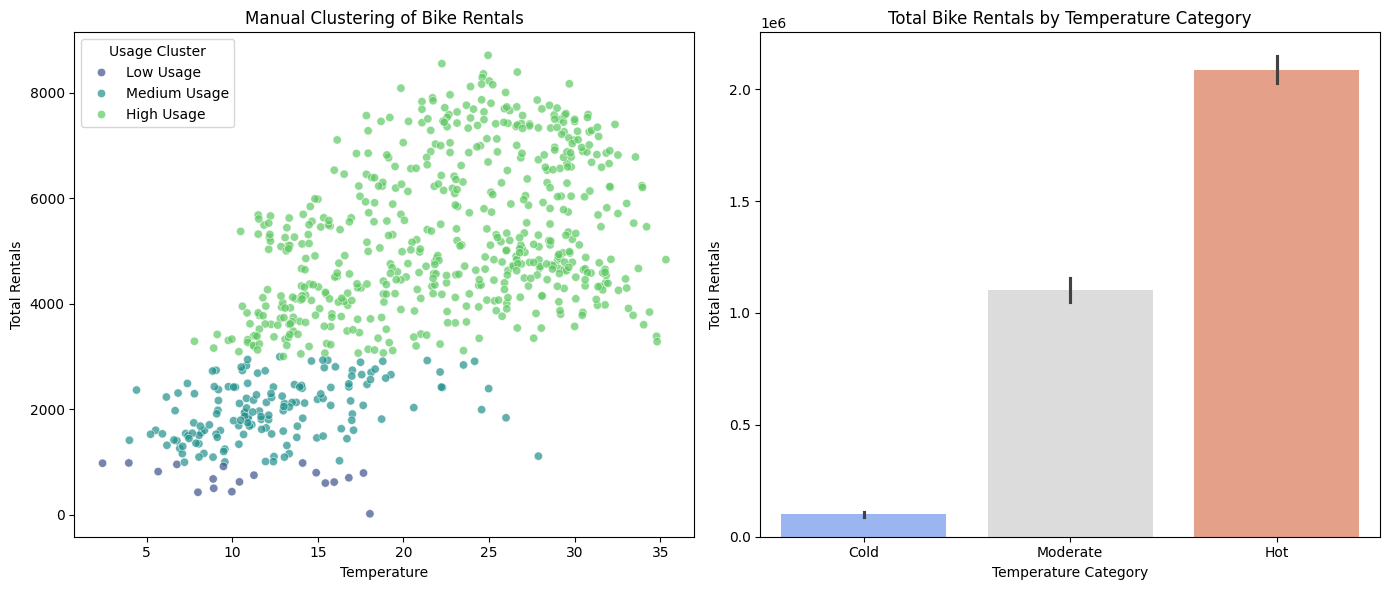

In [72]:
def manual_clustering(value):
    if value < 1000:
        return "Low Usage"
    elif 1000 <= value <= 3000:
        return "Medium Usage"
    else:
        return "High Usage"

df["usage_cluster"] = df["total"].apply(manual_clustering)

bins = [df["temp"].min(), 10, 20, df["temp"].max()]
labels = ["Cold", "Moderate", "Hot"]
df["temp_category"] = pd.cut(df["temp"], bins=bins, labels=labels, include_lowest=True)


fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.scatterplot(x=df["temp"], y=df["total"], hue=df["usage_cluster"], palette="viridis", alpha=0.7, ax=axes[0])
axes[0].set_title("Manual Clustering of Bike Rentals")
axes[0].set_xlabel("Temperature")
axes[0].set_ylabel("Total Rentals")
axes[0].legend(title="Usage Cluster")

sns.barplot(x=df["temp_category"], y=df["total"], estimator=sum, palette="coolwarm", ax=axes[1])
axes[1].set_title("Total Bike Rentals by Temperature Category")
axes[1].set_xlabel("Temperature Category")
axes[1].set_ylabel("Total Rentals")

plt.tight_layout()
plt.show()

Kriteria Clustering:
- **Cold (Temp ≤ 10°C)**
- **Moderate (10°C < Temp ≤ 20°C)**
- **Hot (Temp > 20°C)**

---
Hasil Analisis Clustering:
- **Low Usage (Total Rentals < 1000)**\
Terjadi pada suhu yang lebih rendah (umumnya di musim dingin atau saat cuaca tidak mendukung).
- **Medium Usage (1000 ≤ Total Rentals ≤ 3000)**\
Terjadi pada suhu sedang (sekitar 10-20°C).
Penggunaan sepeda cukup stabil, kemungkinan karena kondisi cuaca mendukung untuk aktivitas luar ruangan.
- **High Usage (Total Rentals > 3000)**\
Terjadi pada suhu yang lebih hangat (di atas 20°C).
Menunjukkan bahwa cuaca yang lebih hangat meningkatkan jumlah penyewaan sepeda secara signifikan.

## Conclusion

- Perkembangan Penyewaan Sepeda Pertahun\
Tahun 2011: `3,405` sepeda/hari (Total: 1,243,103)\
Tahun 2012: `5,599` sepeda/hari (Total: 2,049,576)\
**Penyewaan Sepeda dari tahun 2011 meningkat di tahun 2022**

- Perbedaan User Casual dengan Registered\
Casual (tidak terdaftar): `848` sepeda/hari (Total: 620,017)\
Registered (terdaftar): `3,656` sepeda/hari (Total: 2,672,662)\
**Lebih banyak User terdaftar daripada tidak terdaftar menunjukkan pengguna lebih senang mendaftar dahulu sebelum memesan sepeda**

- Musim apa yang mencapai puncak penyewaan sepeda ?\
Musim Gugur (Fall) tertinggi: `5,644` sepeda/hari (Total: 1,061,129)\
Musim Semi (Spring) terendah: `2,604` sepeda/hari.\
**Musim Gugur adalah musim penyewaan tertinggi**

- Apakah Jumlah penyewaan pada Weekday dan Weekend memiliki perbedaan yang signifikan\
Hari dengan jumlah penyewaan sepeda tertinggi adalah Jumat (Friday) dengan total `487.790` penyewaan.\
Hari dengan jumlah penyewaan sepeda terendah adalah Minggu (Sabtu) dengan total `444.027` penyewaan.\
**Hari Jumah adalah Hari penyewaan tertinggi**

- Apakah dengan adanya Liburan meningkatkan penyewaan sepeda?\
Hari biasa: `4,527` sepeda/hari.\
Hari libur: `3,735` sepeda/hari.\
**Penyewaan justru lebih rendah saat libur.**

- Apakah cuaca mempengaruhi jumlah penyewaan sepeda?\
Cuaca cerah/berawan: `4,876` sepeda/hari.\
Cuaca berkabut: `4,035` sepeda/hari.\
Hujan atau salju ringan: `1,803` sepeda/hari.\
**Cuaca buruk mengurangi jumlah penyewaan secara signifikan.**

- Bagaimana Hubungan antara temperature dan total rentals dengan Clustering ?\
Cuaca memiliki pengaruh besar terhadap jumlah penyewaan sepeda. Semakin hangat suhu, semakin banyak penyewaan sepeda.\
Kategori penyewaan sepeda menunjukkan pola yang jelas: suhu dingin mengurangi penyewaan, sementara suhu sedang dan hangat meningkatkan penyewaan.\
Musim kemungkinan memainkan peran penting, karena suhu yang lebih tinggi sering terjadi di musim panas, yang meningkatkan penggunaan sepeda.